In [92]:
import pandas as pd
data = pd.read_csv("/Users/sujithrathod/Missing_/titanic_original.csv")
data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [93]:
data.isnull().sum() #checking missing value

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [94]:
# delete the rows or data point to handle missing value
data.shape

(1310, 14)

In [95]:
data.dropna().shape #droping colums having null
data.dropna(subset=["age"],inplace=True)

In [96]:
data.dropna(axis=1) #columns having null will be droped

,pclass,survived,name,sex,age,sibsp,parch,ticket
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781
...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670


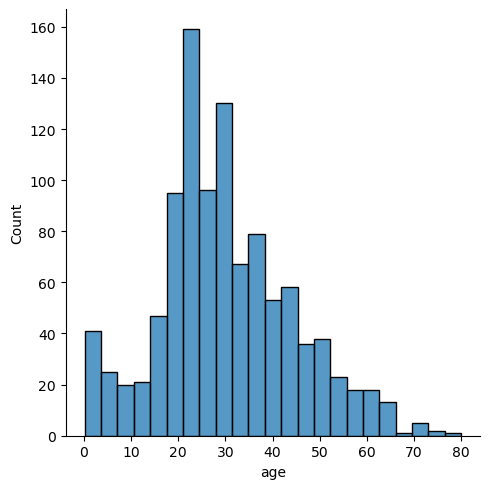

In [97]:
# Mean Value Imputataion
import seaborn as sns
sns.displot(data["age"])

<Axes: xlabel='age', ylabel='Count'>

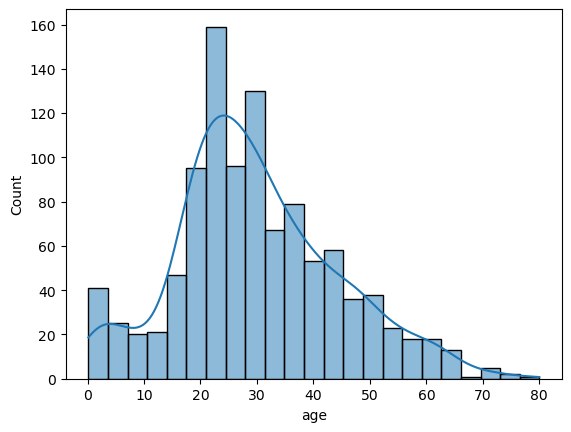

In [98]:
sns.histplot(data["age"],kde=True)

MEAN

In [99]:
# normally distributed data
data["age_mean"] = data["age"].fillna(data["age"].mean())  #replace with mean value

MEDIAN

In [100]:
# Median imputation Works well when we have outliers in dataset
data["age_median"] = data["age"].fillna(data["age"].median())
data[["age","age_mean","age_median"]]

,age,age_mean,age_median
0,29.0000,29.0000,29.0000
1,0.9167,0.9167,0.9167
2,2.0000,2.0000,2.0000
3,30.0000,30.0000,30.0000
4,25.0000,25.0000,25.0000
...,...,...,...
1301,45.5000,45.5000,45.5000
1304,14.5000,14.5000,14.5000
1306,26.5000,26.5000,26.5000
1307,27.0000,27.0000,27.0000


MODE-> Categorical Values

In [101]:
data[data["embarked"].isnull()] 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_mean,age_median
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN,38.0,38.0
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",62.0,62.0


In [102]:
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [103]:
mode_value = data[data["embarked"].notna()]["embarked"].mode()[0]
data["embarked_mode"] = data["embarked"].fillna(mode_value)

In [104]:
data[["embarked","embarked_mode"]]

,embarked,embarked_mode
0,S,S
1,S,S
2,S,S
3,S,S
4,S,S
...,...,...
1301,C,C
1304,C,C
1306,C,C
1307,C,C


In [ ]:
# classification -> 2 categories -> binary classification ->(y/n)
# fix imbalanced datasets

1. Up sampling -> increase the minority
2. Down sampling -> decrease the majority



In [110]:
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

UP Sampling


In [ ]:
from sklearn.utils import resample
# resample(minority,n_samples=len(majoriy),replace=True,random_state=42) -> 900 (0) and 900 (1)

Down Sampling -> loosing datas

In [113]:

from sklearn.utils import resample
# resample(majority,n_samples=len(minority),replace=False,radom_state=42)

SMOTE(Synthetic Minority Oversampling Techinique) for UP Sampling -> increase variance -> interolating between existing instances

In [2]:
from sklearn.datasets import make_classification
""" def make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
): """

' def make_classification(\n    n_samples=100,\n    n_features=20,\n    *,\n    n_informative=2,\n    n_redundant=2,\n    n_repeated=0,\n    n_classes=2,\n    n_clusters_per_class=2,\n    weights=None,\n    flip_y=0.01,\n    class_sep=1.0,\n    hypercube=True,\n    shift=0.0,\n    scale=1.0,\n    shuffle=True,\n    random_state=None,\n): '

In [11]:
x,y = make_classification(n_samples=1000, n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.9],random_state = 12)

In [12]:
import pandas as pd
df1 = pd.DataFrame(x,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])
df_3 = pd.concat([df1,df2],axis=1)
df_3

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [13]:
df_3['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

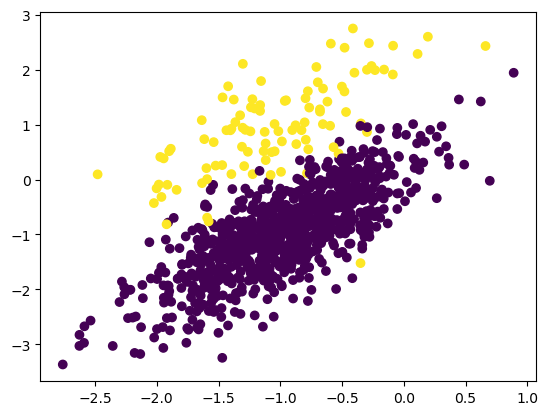

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df_3["f1"],df_3["f2"],c=df_3["target"])

In [15]:
!pip install imblearn

In [17]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(df_3[['f1','f2']],df_3['target'])

In [18]:
x.shape

(1800, 2)

In [19]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=["target"])
Up_sample = pd.concat([df1,df2],axis=1)


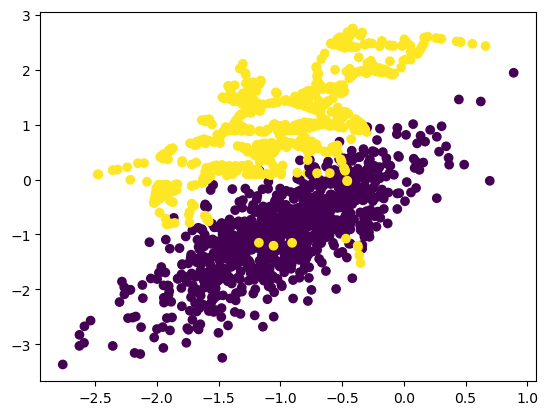

In [20]:
plt.scatter(Up_sample["f1"],Up_sample["f2"],c = Up_sample["target"])